In [1]:
%reset
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import scipy as sp

from scipy import signal
from scipy import io as sio

import neurodsp as ndsp
from neurodsp import spectral
from neurodsp import filt

from jupyterthemes import jtplot
jtplot.style()

import matplotlib.pyplot as plt
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Generating a Weak PING
Here, I modify several parameters at a time from Malerba et al. (2016) network model, following what I understood to be Paola's suggestion: 
<br>
> increase gmaxEE + increase direct current to inhibitory neurons + increase gmaxII to synchronize your inhibitory population without having to totally crank up the direct current + slightly increase the direct current to pyramidal neurons to achieve 6 Hz oscillation in the firing rate figures



## First attempt
| model params | new value | orig value | 
| --- | --- | --- | 
| p.gmaxII | 5/(60/100) = 8.3 | 3/(80/100) = 3.75 | 
| p.gmaxEE | (5/(60/100))/2 = 4.17| (5/(60/100))/10 = 0.83|
| p.Idc | 360 | 180 |


In [3]:
sim01_gmaxEEIdcgmaxII_01 = sio.loadmat('sim1_weakPING_gmaxEEIdcgmaxII_simdur2sec.mat',squeeze_me=True)

# get the spike times for excitatory and inhibitory neurons
spktimes_e_gmaxEEIdcgmaxII_01 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_01['tsp_E']['times'])
cell_id_e_gmaxEEIdcgmaxII_01 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_01['tsp_E']['celln'])

spktimes_i_gmaxEEIdcgmaxII_01 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_01['tsp_I']['times'])
cell_id_i_gmaxEEIdcgmaxII_01 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_01['tsp_I']['celln'])

dict_Espktrns_gmaxEEIdcgmaxII_01 = {'cell_id':cell_id_e_gmaxEEIdcgmaxII_01[0],
               'spktimes':spktimes_e_gmaxEEIdcgmaxII_01[0]}
dict_Ispktrns_gmaxEEIdcgmaxII_01 = {'cell_id':cell_id_i_gmaxEEIdcgmaxII_01[0],
               'spktimes':spktimes_i_gmaxEEIdcgmaxII_01[0]}

df_Espktrns_gmaxEEIdcgmaxII_01 = pd.DataFrame(dict_Espktrns_gmaxEEIdcgmaxII_01)
df_Ispktrns_gmaxEEIdcgmaxII_01 = pd.DataFrame(dict_Ispktrns_gmaxEEIdcgmaxII_01)

# get the raw lfp
lfp_gmaxEEIdcgmaxII_01 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_01['lfp'])

# define the time axis & bandpass
fs = 1000 # [=Hz] sampling rate
t = np.arange(len(lfp_gmaxEEIdcgmaxII_01))/fs
f_range_ripple = (100, 300) #[=Hz]
f_range_higamma = (65,95)  #[=Hz]
f_range_logamma = (35,55)  #[=Hz]
f_range_beta = (15,35)  #[=Hz]
f_range_theta = (4,12)  #[=Hz]

# get the filtered lfp
filt_lfp_ripple_gmaxEEIdcgmaxII_01 = filt.filter_signal(lfp_gmaxEEIdcgmaxII_01, fs, 'bandpass', f_range_ripple)
filt_lfp_higamma_gmaxEEIdcgmaxII_01 = filt.filter_signal(lfp_gmaxEEIdcgmaxII_01, fs, 'bandpass', f_range_higamma)
filt_lfp_logamma_gmaxEEIdcgmaxII_01 = filt.filter_signal(lfp_gmaxEEIdcgmaxII_01, fs, 'bandpass', f_range_logamma)

df_lfp_gmaxEEIdcgmaxII_01 = pd.DataFrame({'time': t,
                                'lfp': lfp_gmaxEEIdcgmaxII_01,
                                'filt lfp': filt_lfp_ripple_gmaxEEIdcgmaxII_01,
                       'filt lfp: hi gamma': filt_lfp_higamma_gmaxEEIdcgmaxII_01,
                       'filt lfp: lo gamma': filt_lfp_logamma_gmaxEEIdcgmaxII_01})


###### ------------------------------------------------------------------------------######
###### ------------------------------------------------------------------------------######

# extract the original network simulation to compare against
sim01_origparams = sio.loadmat('example_2sec.mat',squeeze_me=True)

spktimes_e = np.atleast_1d(sim01_origparams['tsp_E']['times'])
cell_id_e = np.atleast_1d(sim01_origparams['tsp_E']['celln'])

spktimes_i = np.atleast_1d(sim01_origparams['tsp_I']['times'])
cell_id_i = np.atleast_1d(sim01_origparams['tsp_I']['celln'])

dict_Espktrns = {'cell_id':cell_id_e[0],
               'spktimes':spktimes_e[0]}
dict_Ispktrns = {'cell_id':cell_id_i[0],
               'spktimes':spktimes_i[0]}

df_Espktrns = pd.DataFrame(dict_Espktrns)
df_Ispktrns = pd.DataFrame(dict_Ispktrns)

# get the raw and filtered lfp
lfp = np.atleast_1d(sim01_origparams['lfp'])

# get the filtered lfp

filt_lfp_ripple = filt.filter_signal(lfp, fs, 'bandpass', f_range_ripple)
filt_lfp_higamma = filt.filter_signal(lfp, fs, 'bandpass', f_range_higamma)
filt_lfp_logamma = filt.filter_signal(lfp, fs, 'bandpass', f_range_logamma)

df_lfp = pd.DataFrame({'time': t,
                       'lfp': lfp,
                       'filt lfp: ripple': filt_lfp_ripple,
                       'filt lfp: hi gamma': filt_lfp_higamma,
                       'filt lfp: lo gamma': filt_lfp_logamma})

Transition bandwidth is 43.9 Hz. Pass/stop bandwidth is 200 Hz
Transition bandwidth is 21.5 Hz. Pass/stop bandwidth is 30 Hz
Transition bandwidth is 12.7 Hz. Pass/stop bandwidth is 20 Hz
Transition bandwidth is 43.9 Hz. Pass/stop bandwidth is 200 Hz
Transition bandwidth is 21.5 Hz. Pass/stop bandwidth is 30 Hz
Transition bandwidth is 12.7 Hz. Pass/stop bandwidth is 20 Hz


(0, 1.5)

<Figure size 432x288 with 0 Axes>

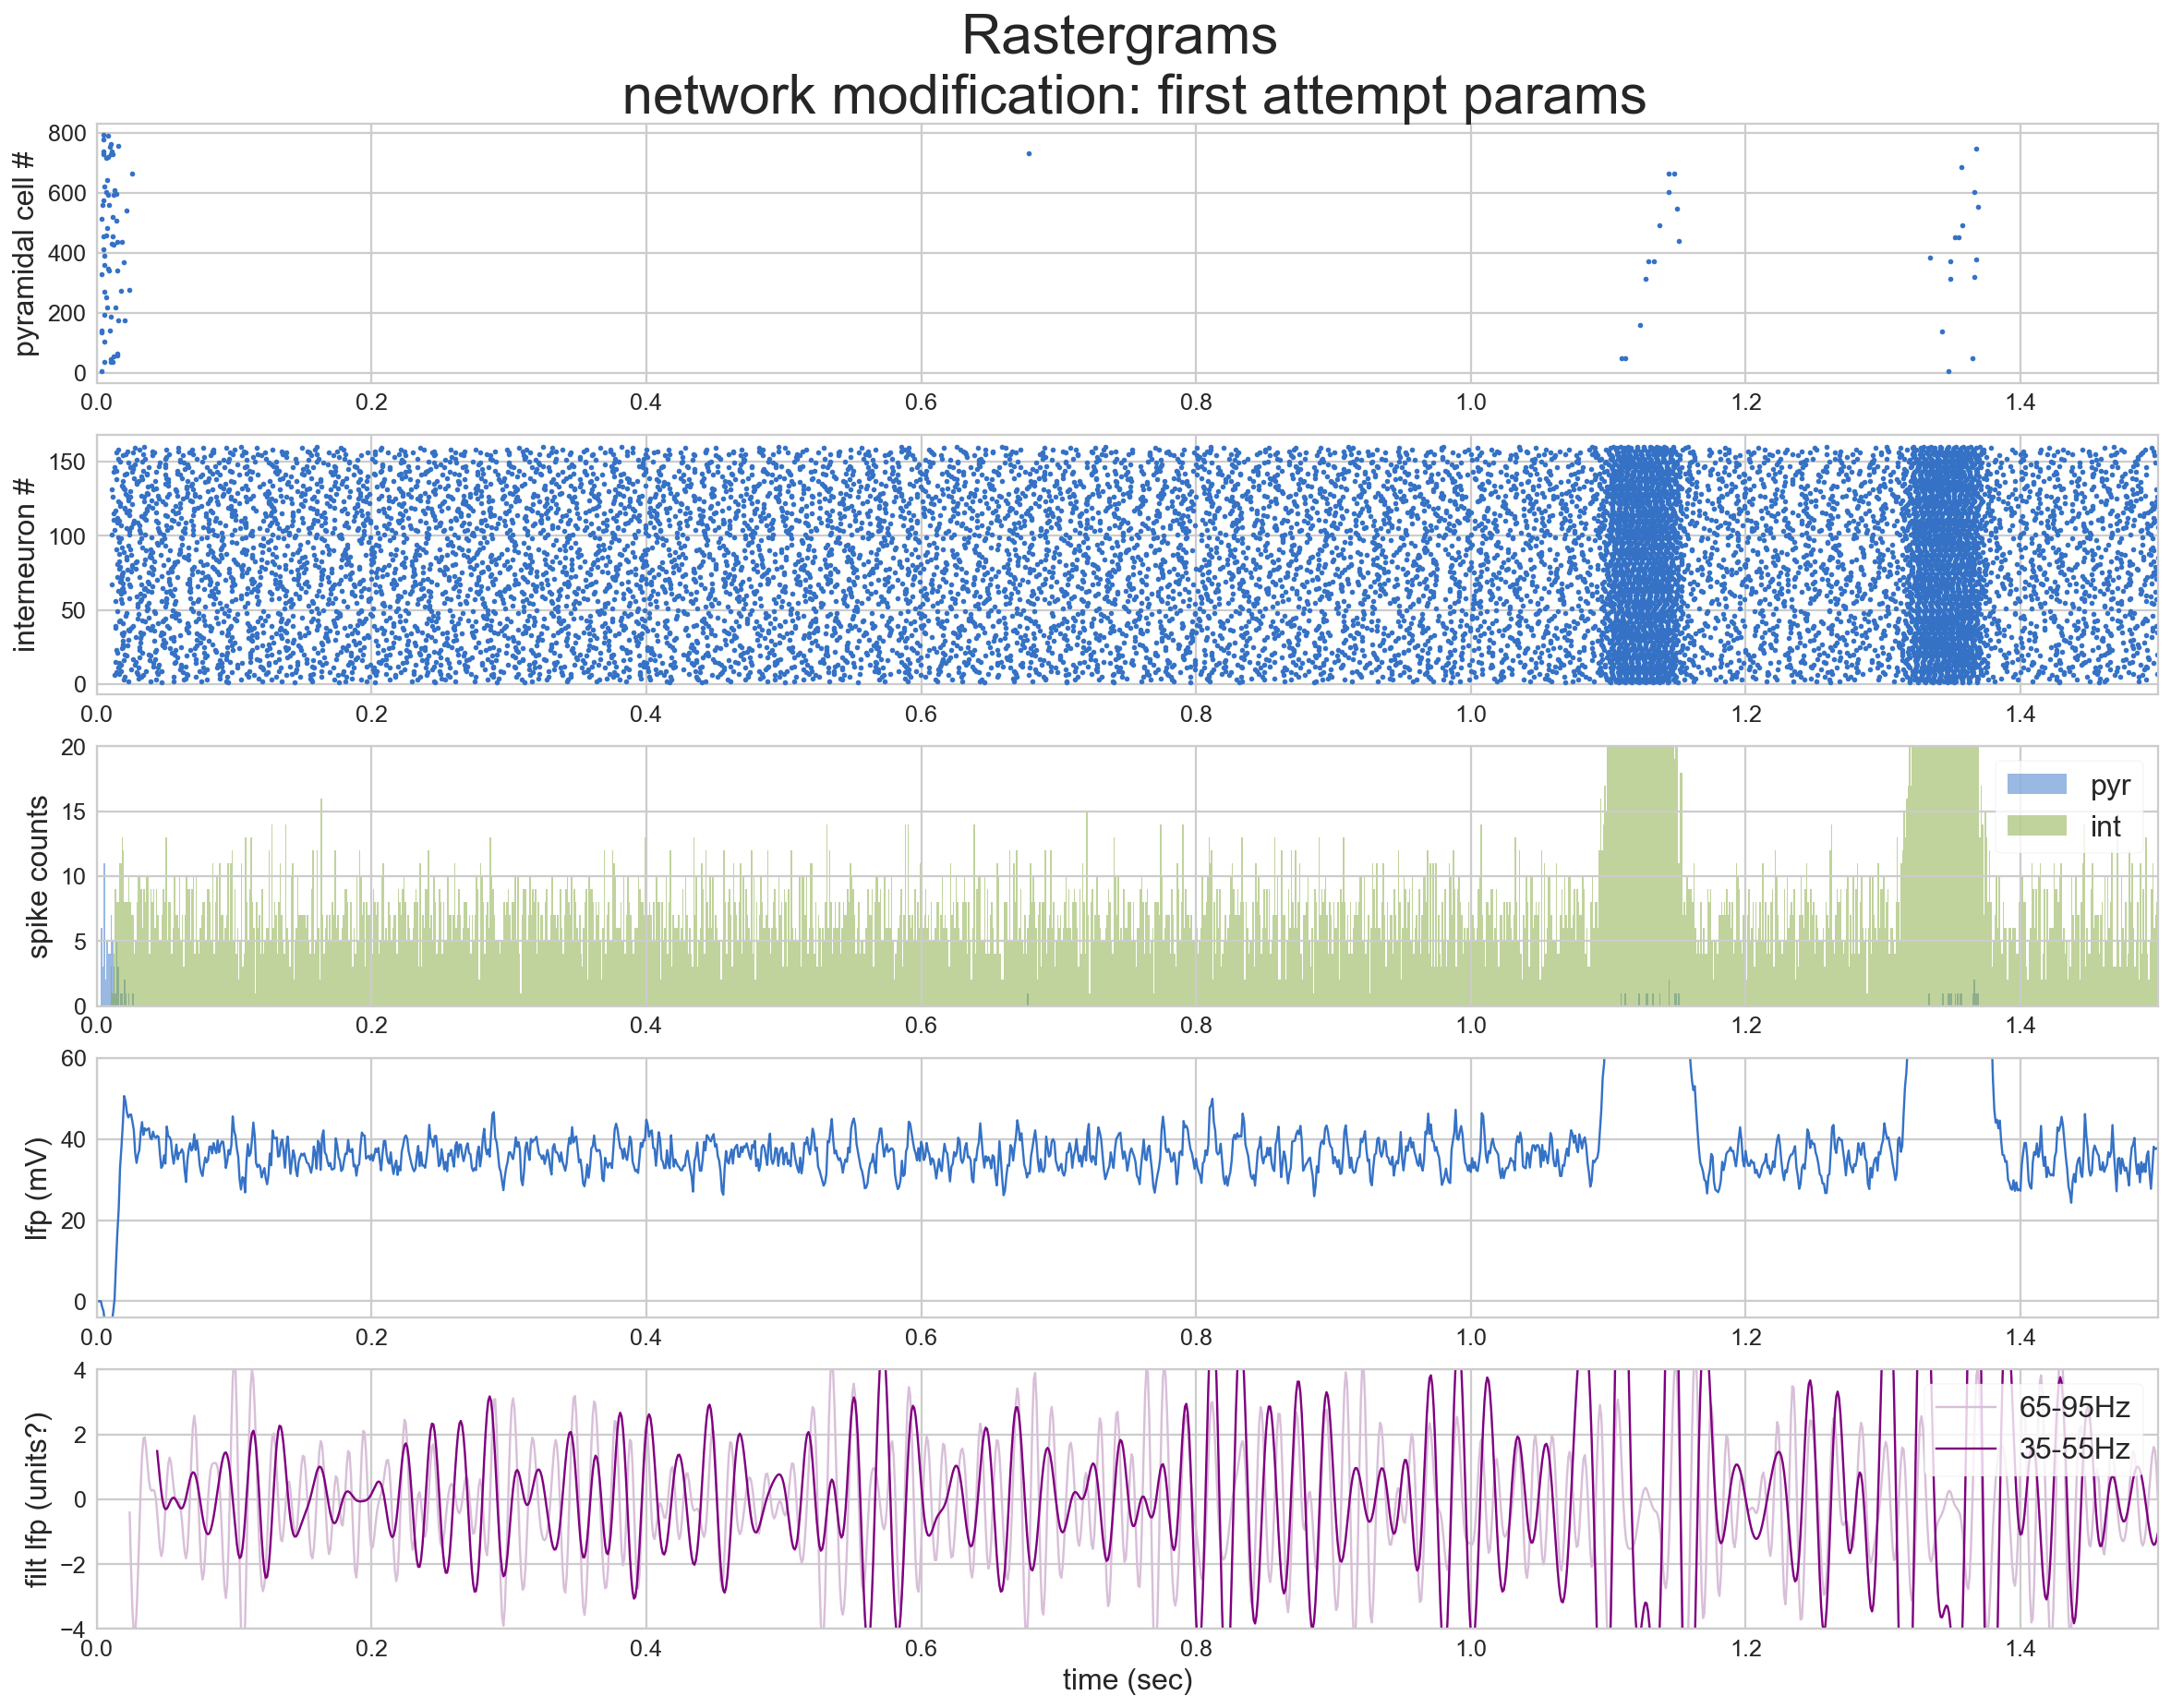

In [11]:
ts = 1.5    # window duration
y_fonts = 16;

plt.figure()
plt.figure(figsize=(20,15))
plt.tick_params(axis='both',labelsize=20)
# ----------------------------plot pyr cell rasters----------------------------------------
rescale_x = (0, ts);

df_Espktrns_gmaxEEIdcgmaxII_01_partial = df_Espktrns_gmaxEEIdcgmaxII_01[df_Espktrns_gmaxEEIdcgmaxII_01['spktimes']<=ts]
plt.subplot(5,1,1)
plt.plot(df_Espktrns_gmaxEEIdcgmaxII_01_partial['spktimes'], df_Espktrns_gmaxEEIdcgmaxII_01_partial['cell_id'],'.')
plt.ylabel('pyramidal cell #',fontsize=y_fonts)
plt.xlim(rescale_x)
plt.title('Rastergrams \n network modification: first attempt params',fontsize=30)

# df_Espktrns_partial = df_Espktrns[df_Espktrns['spktimes']<=ts]
# plt.subplot(5,2,2)
# plt.plot(df_Espktrns['spktimes'], df_Espktrns['cell_id'],'.')
# plt.xlim(rescale_x)
# plt.title('Rastergrams \n network modification: none',fontsize=30)

# ----------------------------plot interneuron rasters--------------------------------------
## here still have to change the name of the variables!
df_Ispktrns_gmaxEEIdcgmaxII_01_partial = df_Ispktrns_gmaxEEIdcgmaxII_01[df_Ispktrns_gmaxEEIdcgmaxII_01['spktimes']<=ts]
plt.subplot(5,1,2)
plt.plot(df_Ispktrns_gmaxEEIdcgmaxII_01['spktimes'], df_Ispktrns_gmaxEEIdcgmaxII_01['cell_id'],'.')
plt.ylabel('interneuron #',fontsize=y_fonts)
plt.xlim(rescale_x)

# df_Ispktrns_partial = df_Ispktrns[df_Ispktrns['spktimes']<=ts]
# plt.subplot(5,2,4)
# plt.plot(df_Ispktrns['spktimes'], df_Ispktrns['cell_id'],'.')
# plt.xlim(rescale_x)

# ----------------------------plot spike histograms--------------------------------------
rescale_y_spikes = (0,20)

plt.subplot(5,1,3)
plt.hist(df_Espktrns_gmaxEEIdcgmaxII_01_partial['spktimes'],t,alpha=0.5,label='pyr')
plt.hist(df_Ispktrns_gmaxEEIdcgmaxII_01_partial['spktimes'],t,alpha=0.5,label='int')
plt.legend(loc='upper right',fontsize=y_fonts)
plt.ylabel('spike counts',fontsize=y_fonts)
plt.ylim(rescale_y_spikes)
plt.xlim(rescale_x)

# plt.subplot(5,2,6)
# plt.hist(df_Espktrns_partial['spktimes'],t,alpha=0.5)
# plt.hist(df_Ispktrns_partial['spktimes'],t,alpha=0.5)
# plt.xlim(rescale_x)

# ----------------------------plot raw lfp--------------------------------------------------
rescale_y = (-4.0, 60.0)

df_lfp_gmaxEEIdcgmaxII_01_partial = df_lfp_gmaxEEIdcgmaxII_01[df_lfp_gmaxEEIdcgmaxII_01['time']<=ts]
plt.subplot(5,1,4)
plt.plot(df_lfp_gmaxEEIdcgmaxII_01_partial['time'],df_lfp_gmaxEEIdcgmaxII_01_partial['lfp'])
plt.ylabel('lfp (mV)',fontsize=y_fonts)
plt.ylim(rescale_y)
plt.xlim(rescale_x)

# df_lfp_partial = df_lfp[df_lfp['time']<=ts]
# plt.subplot(5,2,8)
# plt.plot(df_lfp_partial['time'], df_lfp_partial['lfp'])
# plt.ylim(rescale_y)
# plt.xlim(rescale_x)

# ----------------------------plot filtered lfp----------------------------------------------
rescale_y = (-4.0, 4.0)

plt.subplot(5,1,5)
f1 = plt.plot(df_lfp_gmaxEEIdcgmaxII_01_partial['time'],df_lfp_gmaxEEIdcgmaxII_01_partial['filt lfp: hi gamma'],color='thistle')
f2 = plt.plot(df_lfp_gmaxEEIdcgmaxII_01_partial['time'],df_lfp_gmaxEEIdcgmaxII_01_partial['filt lfp: lo gamma'],color='purple')
plt.ylabel('filt lfp (units?)',fontsize=y_fonts)
plt.xlabel('time (sec)',fontsize=y_fonts)
plt.legend((f1[0],f2[0]),('65-95Hz','35-55Hz'),fontsize=y_fonts)
plt.ylim(rescale_y)
plt.xlim(rescale_x)

# plt.subplot(5,2,10)
# f1 = plt.plot(df_lfp_partial['time'],df_lfp_partial['filt lfp: hi gamma'],color='thistle')
# f2 = plt.plot(df_lfp_partial['time'],df_lfp_partial['filt lfp: lo gamma'],color='purple')
# plt.xlabel('time (sec)',fontsize=30)
# plt.ylim(rescale_y)
# plt.xlim(rescale_x)


Increased the baseline excitability of the interneurons way too much--scale it back down.

## Second Attempt
| model params | new value | orig value | 
| --- | --- | --- | 
| p.gmaxII | 5/(60/100) = 8.3 | 3/(80/100) = 3.75 | 
| p.gmaxEE | (5/(60/100))/2 = 4.17| (5/(60/100))/10 = 0.83|
| p.Idc | 180+(180+.2) = 216 | 180 |

In [12]:
sim01_gmaxEEIdcgmaxII_02 = sio.loadmat('sim1_weakPING_gmaxEEIdc20pctincgmaxII_simdur2sec.mat',squeeze_me=True)

# get the spike times for excitatory and inhibitory neurons
spktimes_e_gmaxEEIdcgmaxII_02 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_02['tsp_E']['times'])
cell_id_e_gmaxEEIdcgmaxII_02 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_02['tsp_E']['celln'])

spktimes_i_gmaxEEIdcgmaxII_02 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_02['tsp_I']['times'])
cell_id_i_gmaxEEIdcgmaxII_02 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_02['tsp_I']['celln'])

dict_Espktrns_gmaxEEIdcgmaxII_02 = {'cell_id':cell_id_e_gmaxEEIdcgmaxII_02[0],
               'spktimes':spktimes_e_gmaxEEIdcgmaxII_02[0]}
dict_Ispktrns_gmaxEEIdcgmaxII_02 = {'cell_id':cell_id_i_gmaxEEIdcgmaxII_02[0],
               'spktimes':spktimes_i_gmaxEEIdcgmaxII_02[0]}

df_Espktrns_gmaxEEIdcgmaxII_02 = pd.DataFrame(dict_Espktrns_gmaxEEIdcgmaxII_02)
df_Ispktrns_gmaxEEIdcgmaxII_02 = pd.DataFrame(dict_Ispktrns_gmaxEEIdcgmaxII_02)

# get the raw lfp
lfp_gmaxEEIdcgmaxII_02 = np.atleast_1d(sim01_gmaxEEIdcgmaxII_02['lfp'])

# define the time axis & bandpass
fs = 1000 # [=Hz] sampling rate
t = np.arange(len(lfp_gmaxEEIdcgmaxII_02))/fs
f_range_ripple = (100, 300) #[=Hz]
f_range_higamma = (65,95)  #[=Hz]
f_range_logamma = (35,55)  #[=Hz]
f_range_beta = (15,35)  #[=Hz]
f_range_theta = (4,12)  #[=Hz]

# get the filtered lfp
filt_lfp_ripple_gmaxEEIdcgmaxII_02 = filt.filter_signal(lfp_gmaxEEIdcgmaxII_02, fs, 'bandpass', f_range_ripple)
filt_lfp_higamma_gmaxEEIdcgmaxII_02 = filt.filter_signal(lfp_gmaxEEIdcgmaxII_02, fs, 'bandpass', f_range_higamma)
filt_lfp_logamma_gmaxEEIdcgmaxII_02 = filt.filter_signal(lfp_gmaxEEIdcgmaxII_02, fs, 'bandpass', f_range_logamma)

df_lfp_gmaxEEIdcgmaxII_02 = pd.DataFrame({'time': t,
                                'lfp': lfp_gmaxEEIdcgmaxII_02,
                                'filt lfp': filt_lfp_ripple_gmaxEEIdcgmaxII_02,
                       'filt lfp: hi gamma': filt_lfp_higamma_gmaxEEIdcgmaxII_02,
                       'filt lfp: lo gamma': filt_lfp_logamma_gmaxEEIdcgmaxII_02})


Transition bandwidth is 43.9 Hz. Pass/stop bandwidth is 200 Hz
Transition bandwidth is 21.5 Hz. Pass/stop bandwidth is 30 Hz
Transition bandwidth is 12.7 Hz. Pass/stop bandwidth is 20 Hz


(0, 1.5)

<Figure size 432x288 with 0 Axes>

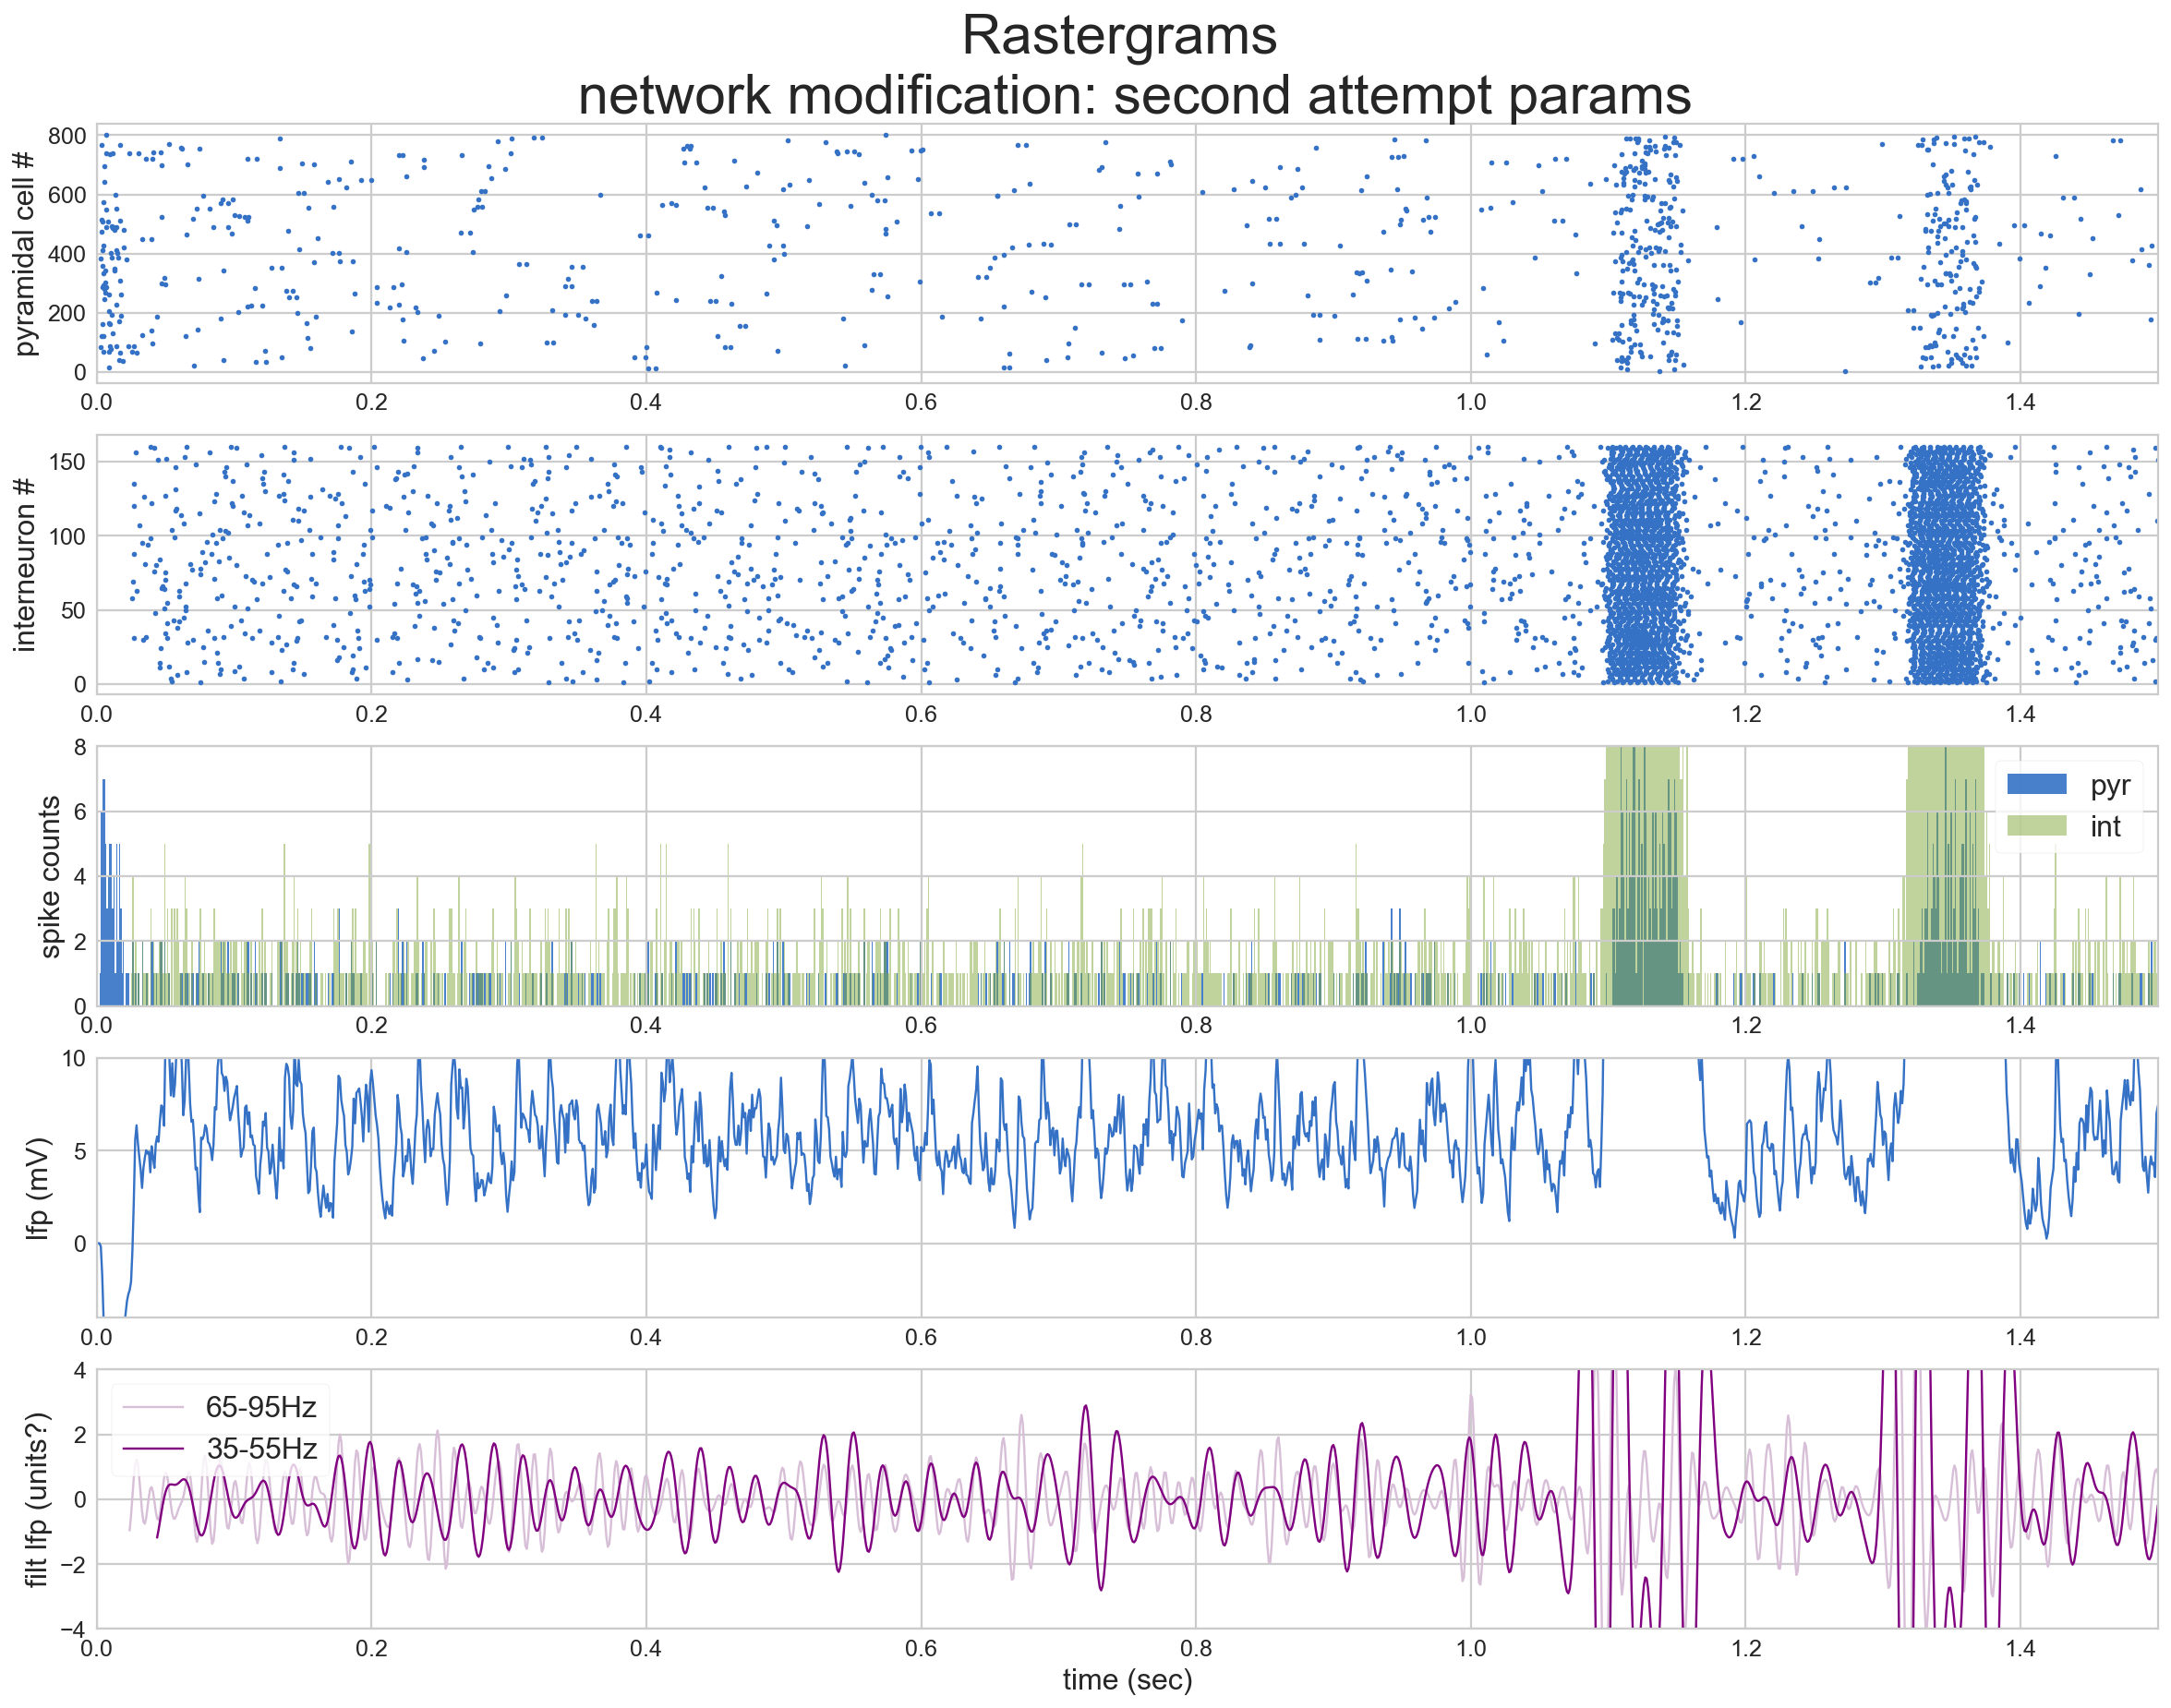

In [17]:
ts = 1.5    # window duration
y_fonts = 16;

plt.figure()
plt.figure(figsize=(20,15))
plt.tick_params(axis='both',labelsize=20)
# ----------------------------plot pyr cell rasters----------------------------------------
rescale_x = (0, ts);

df_Espktrns_gmaxEEIdcgmaxII_02_partial = df_Espktrns_gmaxEEIdcgmaxII_02[df_Espktrns_gmaxEEIdcgmaxII_02['spktimes']<=ts]
plt.subplot(5,1,1)
plt.plot(df_Espktrns_gmaxEEIdcgmaxII_02_partial['spktimes'], df_Espktrns_gmaxEEIdcgmaxII_02_partial['cell_id'],'.')
plt.ylabel('pyramidal cell #',fontsize=y_fonts)
plt.xlim(rescale_x)
plt.title('Rastergrams \n network modification: second attempt params',fontsize=30)

# df_Espktrns_partial = df_Espktrns[df_Espktrns['spktimes']<=ts]
# plt.subplot(5,2,2)
# plt.plot(df_Espktrns['spktimes'], df_Espktrns['cell_id'],'.')
# plt.xlim(rescale_x)
# plt.title('Rastergrams \n network modification: none',fontsize=30)

# ----------------------------plot interneuron rasters--------------------------------------
## here still have to change the name of the variables!
df_Ispktrns_gmaxEEIdcgmaxII_02_partial = df_Ispktrns_gmaxEEIdcgmaxII_02[df_Ispktrns_gmaxEEIdcgmaxII_02['spktimes']<=ts]
plt.subplot(5,1,2)
plt.plot(df_Ispktrns_gmaxEEIdcgmaxII_02['spktimes'], df_Ispktrns_gmaxEEIdcgmaxII_02['cell_id'],'.')
plt.ylabel('interneuron #',fontsize=y_fonts)
plt.xlim(rescale_x)

# df_Ispktrns_partial = df_Ispktrns[df_Ispktrns['spktimes']<=ts]
# plt.subplot(5,2,4)
# plt.plot(df_Ispktrns['spktimes'], df_Ispktrns['cell_id'],'.')
# plt.xlim(rescale_x)

# ----------------------------plot spike histograms--------------------------------------
rescale_y_spikes = (0,8)

plt.subplot(5,1,3)
plt.hist(df_Espktrns_gmaxEEIdcgmaxII_02_partial['spktimes'],t,alpha=0.9,label='pyr')
plt.hist(df_Ispktrns_gmaxEEIdcgmaxII_02_partial['spktimes'],t,alpha=0.5,label='int')
plt.legend(loc='upper right',fontsize=y_fonts)
plt.ylabel('spike counts',fontsize=y_fonts)
plt.ylim(rescale_y_spikes)
plt.xlim(rescale_x)

# plt.subplot(5,2,6)
# plt.hist(df_Espktrns_partial['spktimes'],t,alpha=0.5)
# plt.hist(df_Ispktrns_partial['spktimes'],t,alpha=0.5)
# plt.xlim(rescale_x)

# ----------------------------plot raw lfp--------------------------------------------------
rescale_y = (-4.0, 10.0)

df_lfp_gmaxEEIdcgmaxII_02_partial = df_lfp_gmaxEEIdcgmaxII_02[df_lfp_gmaxEEIdcgmaxII_02['time']<=ts]
plt.subplot(5,1,4)
plt.plot(df_lfp_gmaxEEIdcgmaxII_02_partial['time'],df_lfp_gmaxEEIdcgmaxII_02_partial['lfp'])
plt.ylabel('lfp (mV)',fontsize=y_fonts)
plt.ylim(rescale_y)
plt.xlim(rescale_x)

# df_lfp_partial = df_lfp[df_lfp['time']<=ts]
# plt.subplot(5,2,8)
# plt.plot(df_lfp_partial['time'], df_lfp_partial['lfp'])
# plt.ylim(rescale_y)
# plt.xlim(rescale_x)

# ----------------------------plot filtered lfp----------------------------------------------
rescale_y = (-4.0, 4.0)

plt.subplot(5,1,5)
f1 = plt.plot(df_lfp_gmaxEEIdcgmaxII_02_partial['time'],df_lfp_gmaxEEIdcgmaxII_02_partial['filt lfp: hi gamma'],color='thistle')
f2 = plt.plot(df_lfp_gmaxEEIdcgmaxII_02_partial['time'],df_lfp_gmaxEEIdcgmaxII_02_partial['filt lfp: lo gamma'],color='purple')
plt.ylabel('filt lfp (units?)',fontsize=y_fonts)
plt.xlabel('time (sec)',fontsize=y_fonts)
plt.legend((f1[0],f2[0]),('65-95Hz','35-55Hz'),fontsize=y_fonts)
plt.ylim(rescale_y)
plt.xlim(rescale_x)

# plt.subplot(5,2,10)
# f1 = plt.plot(df_lfp_partial['time'],df_lfp_partial['filt lfp: hi gamma'],color='thistle')
# f2 = plt.plot(df_lfp_partial['time'],df_lfp_partial['filt lfp: lo gamma'],color='purple')
# plt.xlabel('time (sec)',fontsize=30)
# plt.ylim(rescale_y)
# plt.xlim(rescale_x)
